# Model Testing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import random

In [12]:
df = pd.read_csv('dataset.csv')
df = df[df['Position'] != 'Goalkeeper']
df = df.drop('index', axis = 1)
df = df.drop('Minutes', axis = 1)

In [13]:
attacker = df[df['Position'] == 'Attack']
midfielder = df[df['Position'] == 'midfield']
defender = df[df['Position'] == 'Defender']

In [14]:
att = attacker.sample(n = 10, random_state=random.randint(1, 100))
mid = midfielder.sample(n = 10, random_state=random.randint(1, 100))
defe = defender.sample(n = 10, random_state=random.randint(1, 100))

In [15]:
att_value = att[['Player', 'Value']]
att= att.drop(['Player','Yellow Cards', 'Red Cards', 'Value', 'Nation', 'Club', 'Position', 'Passes Completed', 'Passes',
       'Pass Completion %', 'Total Passing Distance',
       'Progressive Passing Distance', 'Shot-Creating Actions',
       'Shot-Creating Actions/90', 'SCA Pass Live', 'SCA Pass Dead',
       'SCA Take-ons', 'SCA Shots', 'SCA Fouls', 'SCA Defense', 'Goal-Creating Actions/90', 'Goal Pass Live',
       'Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls',
       'Goal Defense', 'Tackles', 'Tackles Won', 'Challenges',
       'Successful Challenge %', 'Blocks', 'Interceptions',
       'Tackles + Interceptions', 'Clearances', 'Errors'],axis=1)
att = att.drop(['Matches Played', 'Start', 'Shots', 'Shots On Target', 'Penalties Made', 'Goals Per Shot On Target'], axis=1)

mid_value = mid[['Player', 'Value']]
mid = mid.drop(['Player','Yellow Cards', 'Red Cards', 'Value', 'Nation', 'Club', 'Position','Shots',
       'Shots On Target', 'Shots On Target %', 'Goals Per Shot',
       'Goals Per Shot On Target', 'Average Shot Distance', 
        'Tackles', 'Tackles Won', 'Challenges',
       'Successful Challenge %', 'Blocks', 'Interceptions',
       'Tackles + Interceptions', 'Clearances', 'Errors'],axis=1)
mid = mid.drop(['Matches Played', 'Start','Passes','Penalties Made','Passes Completed', 'Shot-Creating Actions', 'Goal-Creating Actions', 'SCA Pass Live', 'SCA Pass Dead', 'SCA Take-ons',
'SCA Shots', 'SCA Fouls', 'SCA Defense','Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls', 'Goal Pass Live', 'Progressive Passing Distance',
'Goal Defense'], axis=1)

defe_value = defe[['Player', 'Value']]
defe = defe.drop(['Player', 'Matches Played', 'Start', 'Goals',
       'Penalties Made', 'Yellow Cards', 'Red Cards', 'Shots',
       'Shots On Target', 'Shots On Target %', 'Goals Per Shot',
       'Goals Per Shot On Target', 'Average Shot Distance',
       'Shots From Freekicks', 'Passes Completed', 'Passes',
       'Pass Completion %', 'Total Passing Distance', 'Shot-Creating Actions',
       'Shot-Creating Actions/90', 'SCA Pass Live', 'SCA Pass Dead',
       'SCA Take-ons', 'SCA Shots', 'SCA Fouls', 'SCA Defense',
       'Goal-Creating Actions', 'Goal-Creating Actions/90', 'Goal Pass Live',
       'Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls', 'Position',
       'Nation', 'Value', 'Club'
       ],axis=1)
defe = defe.drop(['Tackles + Interceptions', 'Tackles Won', 'Challenges'], axis=1)

# Attacker Model

In [17]:
X = attacker.drop(['Player','Yellow Cards', 'Red Cards', 'Value', 'Nation', 'Club', 'Position', 'Passes Completed', 'Passes',
       'Pass Completion %', 'Total Passing Distance',
       'Progressive Passing Distance', 'Shot-Creating Actions',
       'Shot-Creating Actions/90', 'SCA Pass Live', 'SCA Pass Dead',
       'SCA Take-ons', 'SCA Shots', 'SCA Fouls', 'SCA Defense', 'Goal-Creating Actions/90', 'Goal Pass Live',
       'Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls',
       'Goal Defense', 'Tackles', 'Tackles Won', 'Challenges',
       'Successful Challenge %', 'Blocks', 'Interceptions',
       'Tackles + Interceptions', 'Clearances', 'Errors'],axis=1)
X = X.drop(['Matches Played', 'Start', 'Shots', 'Shots On Target', 'Penalties Made', 'Goals Per Shot On Target'], axis=1)
y = attacker['Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

rs= RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

pt = PowerTransformer()
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

param_values = [True, 90, 3, 5, 2, 20]

rf_Grid = RandomForestRegressor(bootstrap=param_values[0],
                                 max_depth=param_values[1],
                                 max_features=param_values[2],
                                 min_samples_leaf=param_values[3],
                                 min_samples_split=param_values[4],
                                 n_estimators=param_values[5])

rf_Grid.fit(X_train,y_train)

RandomForestRegressor(max_depth=90, max_features=3, min_samples_leaf=5,
                      n_estimators=20)

In [18]:
att_scaled = rs.transform(att)
att_scaled = pt.transform(att_scaled)
predictions = rf_Grid.predict(att_scaled)
att_value['Predicted Value'] = predictions
att_value['Value (millions)'] = att_value['Value'] / 1000000
att_value['Predicted Value (millions)'] = att_value['Predicted Value'] / 1000000
att_value = att_value.iloc[:, [0,3,4]]

# Midfielder Model

In [19]:
X = midfielder.drop(['Player','Yellow Cards', 'Red Cards', 'Value', 'Nation', 'Club', 'Position','Shots',
       'Shots On Target', 'Shots On Target %', 'Goals Per Shot',
       'Goals Per Shot On Target', 'Average Shot Distance', 
        'Tackles', 'Tackles Won', 'Challenges',
       'Successful Challenge %', 'Blocks', 'Interceptions',
       'Tackles + Interceptions', 'Clearances', 'Errors'],axis=1)
X = X.drop(['Matches Played', 'Start','Passes','Penalties Made','Passes Completed', 'Shot-Creating Actions', 'Goal-Creating Actions', 'SCA Pass Live', 'SCA Pass Dead', 'SCA Take-ons',
'SCA Shots', 'SCA Fouls', 'SCA Defense','Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls', 'Goal Pass Live', 'Progressive Passing Distance',
'Goal Defense'], axis=1)
y = midfielder['Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

rs= RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

pt = PowerTransformer()
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

param_values = [0.1, 0.2]

enet_Grid = ElasticNet(alpha=param_values[0],
                      l1_ratio=param_values[1])

enet_Grid.fit(X_train,y_train)

ElasticNet(alpha=0.1, l1_ratio=0.2)

In [20]:
mid_scaled = rs.transform(mid)
mid_scaled = pt.transform(mid_scaled)
predictions = enet_Grid.predict(mid_scaled)
mid_value['Predicted Value'] = predictions
mid_value['Value (millions)'] = mid_value['Value'] / 1000000
mid_value['Predicted Value (millions)'] = mid_value['Predicted Value'] / 1000000
mid_value = mid_value.iloc[:, [0, 3, 4]]

# Defender Model

In [21]:
X = defender.drop(['Player', 'Matches Played', 'Start', 'Goals',
       'Penalties Made', 'Yellow Cards', 'Red Cards', 'Shots',
       'Shots On Target', 'Shots On Target %', 'Goals Per Shot',
       'Goals Per Shot On Target', 'Average Shot Distance',
       'Shots From Freekicks', 'Passes Completed', 'Passes',
       'Pass Completion %', 'Total Passing Distance', 'Shot-Creating Actions',
       'Shot-Creating Actions/90', 'SCA Pass Live', 'SCA Pass Dead',
       'SCA Take-ons', 'SCA Shots', 'SCA Fouls', 'SCA Defense',
       'Goal-Creating Actions', 'Goal-Creating Actions/90', 'Goal Pass Live',
       'Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls', 'Position',
       'Nation', 'Value', 'Club'
       ],axis=1)
X = X.drop(['Tackles + Interceptions', 'Tackles Won', 'Challenges'], axis=1)
y = defender['Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

rs= RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

pt = PowerTransformer()
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

param_values = [True, 40, 8, 10, 8, 20]

rf_Grid2 = RandomForestRegressor(bootstrap=param_values[0],
                                 max_depth=param_values[1],
                                 max_features=param_values[2],
                                 min_samples_leaf=param_values[3],
                                 min_samples_split=param_values[4],
                                 n_estimators=param_values[5])

rf_Grid2.fit(X_train,y_train)

RandomForestRegressor(max_depth=40, max_features=8, min_samples_leaf=10,
                      min_samples_split=8, n_estimators=20)

In [22]:
defe_scaled = rs.transform(defe)
defe_scaled = pt.transform(defe_scaled)
predictions = rf_Grid2.predict(defe_scaled)
defe_value['Predicted Value'] = predictions
defe_value['Value (millions)'] = defe_value['Value'] / 1000000
defe_value['Predicted Value (millions)'] = defe_value['Predicted Value'] / 1000000
defe_value = defe_value.iloc[:, [0, 3, 4]]

# Testing Dataset

In [23]:
att_value

,Player,Value (millions),Predicted Value (millions)
708,Patrik Walemark,0.5,-0.191795
103,Boulaye Dia,13.0,12.487304
115,Noni Madueke,12.0,9.085591
58,Nico Williams,18.0,11.112328
1350,Irvin Cardona,-2.0,-2.246177
1722,Christian Pulisic,-17.0,-9.525297
1016,Leonardo Ruiz,-0.1,-0.578235
1213,Federico Bonazzoli,-1.0,-1.152616
850,Ricardo Pepi,0.0,1.526075
1743,Mohamed Salah,-25.0,-0.390300


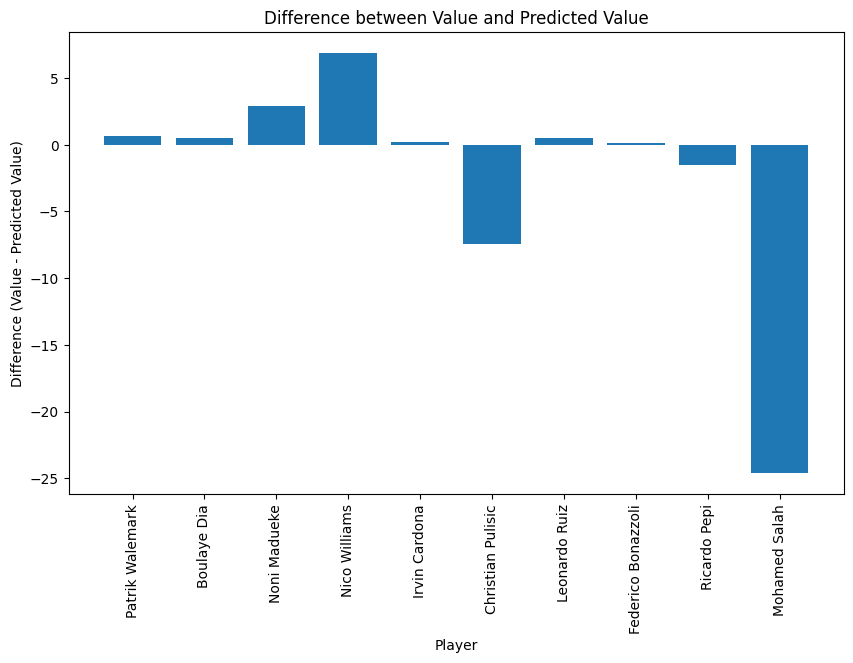

In [24]:
att_value['difference'] = att_value['Value (millions)'] - att_value['Predicted Value (millions)']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(att_value['Player'], att_value['difference'])
plt.xlabel('Player')
plt.ylabel('Difference (Value - Predicted Value)')
plt.title('Difference between Value and Predicted Value')
plt.xticks(rotation=90)
plt.show()


In [25]:
mid_value

,Player,Value (millions),Predicted Value (millions)
1278,Darko Lazovic,-1.50,-2.687910
757,Joao Graca,0.20,1.934688
1055,Leo Leroy,-0.30,-2.731464
233,Conor Gallagher,7.00,9.739646
665,Arne Maier,1.00,4.237033
369,Nicolas Dominguez,4.00,7.959518
1735,Franck Kessie,-20.00,-9.209134
884,Pablo Fornals,0.00,1.363353
292,Deroy Duarte,5.25,7.923758
1152,Marco Benassi,-0.90,-4.028613


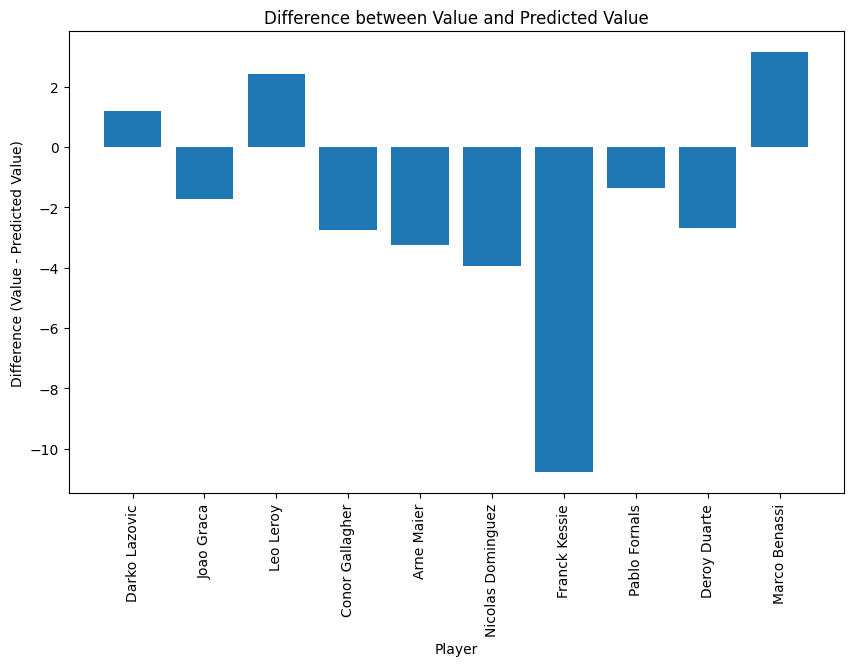

In [26]:
mid_value['difference'] = mid_value['Value (millions)'] - mid_value['Predicted Value (millions)']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(mid_value['Player'], mid_value['difference'])
plt.xlabel('Player')
plt.ylabel('Difference (Value - Predicted Value)')
plt.title('Difference between Value and Predicted Value')
plt.xticks(rotation=90)
plt.show()


In [27]:
defe_value

,Player,Value (millions),Predicted Value (millions)
1388,Nikola Milenkovic,-2.0,-1.971837
1627,Youcef Atal,-8.0,-7.520341
536,Yeray Alvarez,2.0,2.074581
955,Hamari Traore,0.0,-0.433421
1586,Nelson Semedo,-7.0,-7.134692
1282,Ronael Pierre-Gabriel,-1.5,-1.647705
54,Jeremie Frimpong,20.0,19.691637
1444,Ruben Aguilar,-3.0,-3.178445
1485,James Tarkowski,-4.0,-4.415499
1051,Pedrao,-0.3,-0.290759


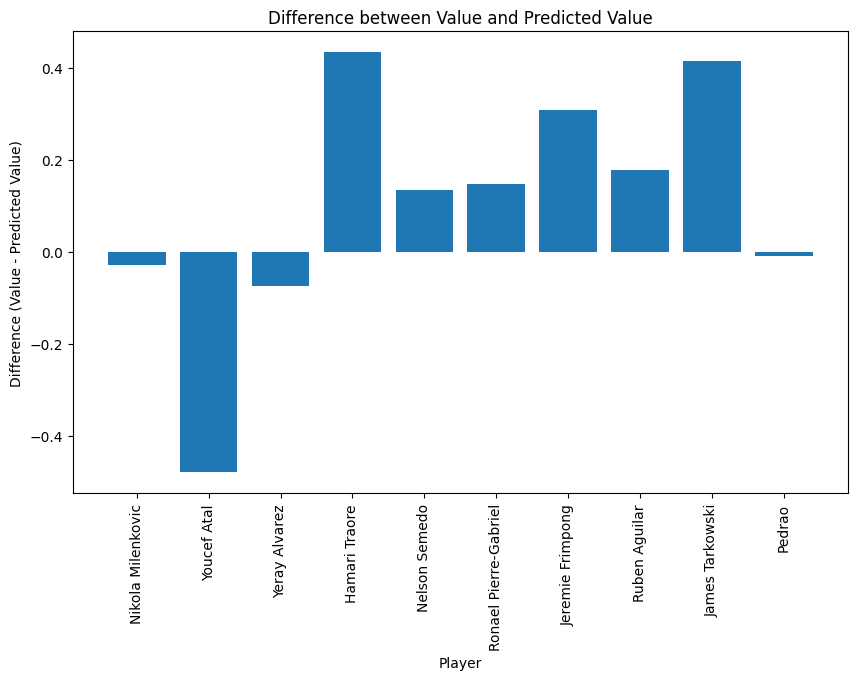

In [28]:
defe_value['difference'] = defe_value['Value (millions)'] - defe_value['Predicted Value (millions)']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(defe_value['Player'], defe_value['difference'])
plt.xlabel('Player')
plt.ylabel('Difference (Value - Predicted Value)')
plt.title('Difference between Value and Predicted Value')
plt.xticks(rotation=90)
plt.show()
